# 2025 ASAP CRN Colloborative Meeting - CRN Cloud Training Workshop Notebook #1

## Overview
This notebook is part 1: **The _basics_ of "Exploratory Data Analysis" (EDA)**


## Outline 
1. [ASAP CRN Cloud __Basics__](#part-1-asap-crn-cloud-basics)
    * Browse ASAP CRN curated datasets and collections on a cloud environment
    * Define paths to dataset 
        * cell-wise data metrics (_cell_ metadata)
        * gene expression data (anndata objects)
        * _dataset_ metadata
    * Load _cell_-metadata and visualize
        * basic QC visualizations
        * UMAP visualizations
    * Load _processed_ `AnnData` object 
        * access gene expression 
        * UMAP visualizations
        * Load _dataset_ metadata
            * merge _dataset_ metadata with _cell_ metadata
            * create Case-Control and Brain Region sub-sets



## Notebooks
All of this content can be found in shorter more specific notebooks.  E.g. During the workshop you can follow along for Parts 1 & 2, but should start with Part 3 ([03_GOI_analysis.ipynb](./03_GOI_analysis.ipynb))

- This notebook [00_full_example_notebook.ipynb](./00_full_example_notebook.ipynb)
    - Part 1 - [01_basic_EDA.ipynb](./01_basic_EDA.ipynb)  
    - Part 2 - [02_dataset_composition.ipynb](./02_dataset_composition.ipynb)
    - Part 3 - [03_GOI_analysis.ipynb](./03_GOI_analysis.ipynb)
        - Part 3-R - [03-R_GOI_analysis.ipynb](./03-R_GOI_analysis.ipynb)
    - Part 4 - [04_DE_analysis.ipynb](./04_DE_analysis.ipynb)



------------------------------
>> NOTES
>>   need to develop an equivalent R version for part 1,2, and 4

## Imports

In [1]:
import numpy as np
import pandas as pd

# Use pathlib for file path manipulation
from pathlib import Path 

# matplotlib and seaborn a pythonic alternative to plotnine
try:
    import seaborn as sns
    import matplotlib.pyplot as plt
except ImportError as e:
    print("Error -> ", e)
    print("Installing seaborn or matplotlib")
    !pip install matplotlib seaborn
    import seaborn as sns
    import matplotlib.pyplot as plt

    
#  plotnine: a ggplot2-compatible Python plotting package
try:
    import plotnine as p9
except ImportError as e:
    print("Error -> ", e)
    print("Installing plotnine")
    !pip install plotnine
    import plotnine as p9

try:
    import scanpy as sc
except ImportError as e:
    print("Error -> ", e)
    print("Installing scanpy")
    !pip install scanpy
    import scanpy as sc

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

# Always show all columns in a Pandas DataFrame
pd.set_option('display.max_columns', None)

time: 259 μs (started: 2025-03-06 08:50:48 +00:00)


-------------------

# Part 1: ASAP CRN Cloud __Basics__

## Browse ASAP CRN datasets and collections

ASAP CRN data availabe in Google Cloud Storage as files and is included as referenced resources in this workspace. The cloud storage buckets automatically mount onto newly created cloud environments. Read more about bucket automounting [here](https://support.workbench.verily.com/docs/how_to_guides/workspace_file_mount/#bucket-automounting)

1. Navigate to the `workspace` folder in the file browser on the left: 

![image.png](./workspace_example1.png)

2. If you don't see this folder, run the `terra resource mount` command in the cell below

3. Navigate through the `01_PMDBS_scRNAseq_Datasets`,`02_PMDBS_bulkRNAseq_Datasets`,`03_Other_PMDBS_Datasets`, `Documentation`, and `Sample_Notebooks` to browse the available data and resources



###  ASAP CRN data paths
First, let's build the paths to our data. 

In [3]:
# Workspace Path
HOME_PATH = Path.home()
WS_PATH =  HOME_PATH / 'workspace'
if not WS_PATH.exists():
    print(f"{WS_PATH} doesn't exist. We need to remount our resources")
    !wb resource mount    

time: 770 μs (started: 2025-03-06 08:53:18 +00:00)


We'll focus in on the datasets processed with our *PMDBS scRNAseq* workflow.  Specifically the _cohort_ dataset: `asap-cohort-pmdbs-sc-rnaseq`.  This dataset includes samples from 5 Contributing datasets which have been processesed and integrated.  The paths include the following parts.

- `workflow` designates the workflow which performs the aggregation and integration.  In this case the [*PMDBS scRNAseq* workflow](https://github.com/ASAP-CRN/pmdbs-sc-rnaseq-wf)
- `dataset_team` designates the contributing team for the dataset.  In this case _cohort_ designates that it is made from multiple individual contributed datasets.
- `source` designates the _source_ of the samples.  In this case Post-mortem derived Brain samples
- `dataset_type` designates the 
- `bucket_name` designates the datasets gcp bucket
- `dataset_name` designates the unique designation for each dataset or collection

In [4]:
DATASETS_PATH = WS_PATH / "01_PMDBS_scRNAseq_Datasets"
workflow = "pmdbs_sc_rnaseq"
dataset_team = "cohort"
dataset_source = "pmdbs"
dataset_type = "sc-rnaseq"
bucket_name = f"asap-curated-{dataset_team}-{dataset_source}-{dataset_type}"
dataset_name = f"asap-{dataset_team}-{dataset_source}-{dataset_type}"
dataset_path = DATASETS_PATH / bucket_name / workflow

time: 764 μs (started: 2025-03-06 08:53:19 +00:00)


#### Cohort Analysis Path

Now that we've defined the path to our cohort dataset, lets list the curated files for the `cohort_analysis`.   

In [5]:
cohort_analysis_path = dataset_path / "cohort_analysis"

time: 414 μs (started: 2025-03-06 08:53:21 +00:00)


In [6]:
!ls  {cohort_analysis_path} # pythonic way: # [f.name for f in cohort_analysis_path.glob("**/*") if f.is_file()]

asap-cohort.all_genes.csv
asap-cohort.cell_types.csv
asap-cohort.doublet_score.violin.png
asap-cohort.features.umap.png
asap-cohort.final_adata.h5ad
asap-cohort.final_metadata.csv
asap-cohort.final_validation_metrics.csv
asap-cohort.groups.umap.png
asap-cohort.hvg_genes.csv
asap-cohort.initial_metadata.csv
asap-cohort.merged_adata_object.h5ad
asap-cohort.n_genes_by_counts.violin.png
asap-cohort.pct_counts_mt.violin.png
asap-cohort.pct_counts_rb.violin.png
asap-cohort.sample_list.tsv
asap-cohort_scvi_model.tar.gz
asap-cohort.total_counts.violin.png
MANIFEST.tsv
time: 895 ms (started: 2025-03-06 08:53:21 +00:00)


#### Dataset Metadata Path

The dataset metadata can be found in the `release_resources`.  Note that the metadata are organized by the _short_ `dataset_name` rather than `bucket_name`.  



In [7]:
ds_metadata_path = WS_PATH / 'release_resources/asap-crn-cloud-release-resources' / dataset_name / "metadata"

!ls {ds_metadata_path} 

ASSAY_RNAseq.csv  CONDITION.csv  PMDBS.csv     SAMPLE.csv  SUBJECT.csv
CLINPATH.csv	  DATA.csv	 PROTOCOL.csv  STUDY.csv
time: 200 ms (started: 2025-03-06 08:53:22 +00:00)


#### Workshop/Notebook Artifact Path

This is the path to where the artifacts we've created in these notebooks can be found in case you want to skip ahead.  Particularly for the workshop.  In which case you can replace the `local_data_path` with `WORKSHOP_PATH`.

In [8]:
WORKSHOP_PATH = WS_PATH / "release_resources/asap-crn-cloud-release-resources/release-artifacts/2025_CRN_CM_Workshop_Resources_03122025" 

!ls {WORKSHOP_PATH}

data  notebooks
time: 200 ms (started: 2025-03-06 08:53:24 +00:00)


#### Local Data Path
Lets also define a path for copying our data files and exporting intermediate analysis artifacts to your workspace.  In this example we'll make a "workshop_files" in the "ws_files" which are persistent in our Verily Workbench Workspace. 

In [9]:
local_data_path = WS_PATH / "workshop_files"

if not local_data_path.exists():
    local_data_path.mkdir(parents=True)

time: 2.13 ms (started: 2025-03-06 08:53:24 +00:00)


## Load _cell_-metadata for Visualization

Full metadata for the releases CDE schema version are in the 'metadata/' subdirectory.   A summary of raw and curated files for the dataset are also available.  The _dataset metadata_ contains the information about the context and provenance of the samples contributing to the dataset, such as Clinical Pathology status of the donor, the fastq file names, and assay information. The tables are either dataset-level, subject-level, or sample-level.  This is distinguished from the _cell metadata_ below which captures metrics and observation metadata of the gene expression measurements which are cell-level metadata.  (I.e. each row represents a single cell observation). 


In [9]:
cell_metadata_filename = local_data_path  / f"asap-{dataset_team}.final_metadata.csv"

# copy the files to the local_data_path
if not cell_metadata_filename.exists():
    cell_metadata_filename_og = cohort_analysis_path / f"asap-{dataset_team}.final_metadata.csv"
    !cp {cell_metadata_filename_og} {cell_metadata_filename}


cell_metadata_df = pd.read_csv(cell_metadata_filename, low_memory=False)
print(f"We have loaded the cell_metadata for N={cell_metadata_df.shape[0]} cells")

We have loaded the cell_metadata for N=2796736 cells
time: 7.32 s (started: 2025-03-05 21:34:57 -08:00)


## Visualize ASAP CRN Data

We'll use [plotnine](https://plotnine.readthedocs.io/en/v0.12.3/) to visualize ASAP CRN Data.  `plotnine` is a Python implementation of [`ggplot2`](https://ggplot2.tidyverse.org/), the R tidyverse plotting package.  Its syntax is practically identical to `ggplot2`.  Later we'll load the `anndata` summary counts data objects, but for now we'll just look at the cell-wise metadata.

This dataframe is simply the `obs` field from the curated `anndata` object, but provides a smaller footprint entry point into exploring the data.   The dataframe summarizes each cell's (unique 'barcode') _observations_:  QC metrics (CellBender 'cell_probability', 'n_genes_by_counts', 'total_counts', etc), references to the dataset metadata ('sample','batch','team','dataset', etc.), and _downstream_ analysis values ('UMAP_1','UMAP_2', CellAssign 'cell_type', leiden cluster designations, etc.)

### Basic QC

In [10]:
cell_metadata_df.columns.to_list()

['barcode',
 'background_fraction',
 'cell_probability',
 'cell_size',
 'droplet_efficiency',
 'n_genes_by_counts',
 'total_counts',
 'total_counts_rb',
 'pct_counts_rb',
 'total_counts_mt',
 'pct_counts_mt',
 'doublet_score',
 'sample',
 'batch',
 'team',
 'dataset',
 'batch_id',
 'S_score',
 'G2M_score',
 'phase',
 '_scvi_batch',
 '_scvi_labels',
 'leiden_res_0.05',
 'leiden_res_0.10',
 'leiden_res_0.20',
 'leiden_res_0.40',
 'cell_type',
 'UMAP_1',
 'UMAP_2']

time: 1.57 ms (started: 2025-03-05 21:35:04 -08:00)


For instance we can see that CellAssign over these 2.8m cells infers mostly Excitatory Neurons, and Inhibitory Neurons are probably under-represented. (In the future cell-types will be inferred by leveraging a Whole Human Brain atlas via the Allen Brain Cell's MapMyCells.)

In [11]:
cell_metadata_df["cell_type"].value_counts()

cell_type
ExN      1210484
OPC       922838
Oligo     363465
Astro     183842
MG         75153
VC         36770
InN         4184
Name: count, dtype: int64

time: 81.5 ms (started: 2025-03-05 21:35:04 -08:00)


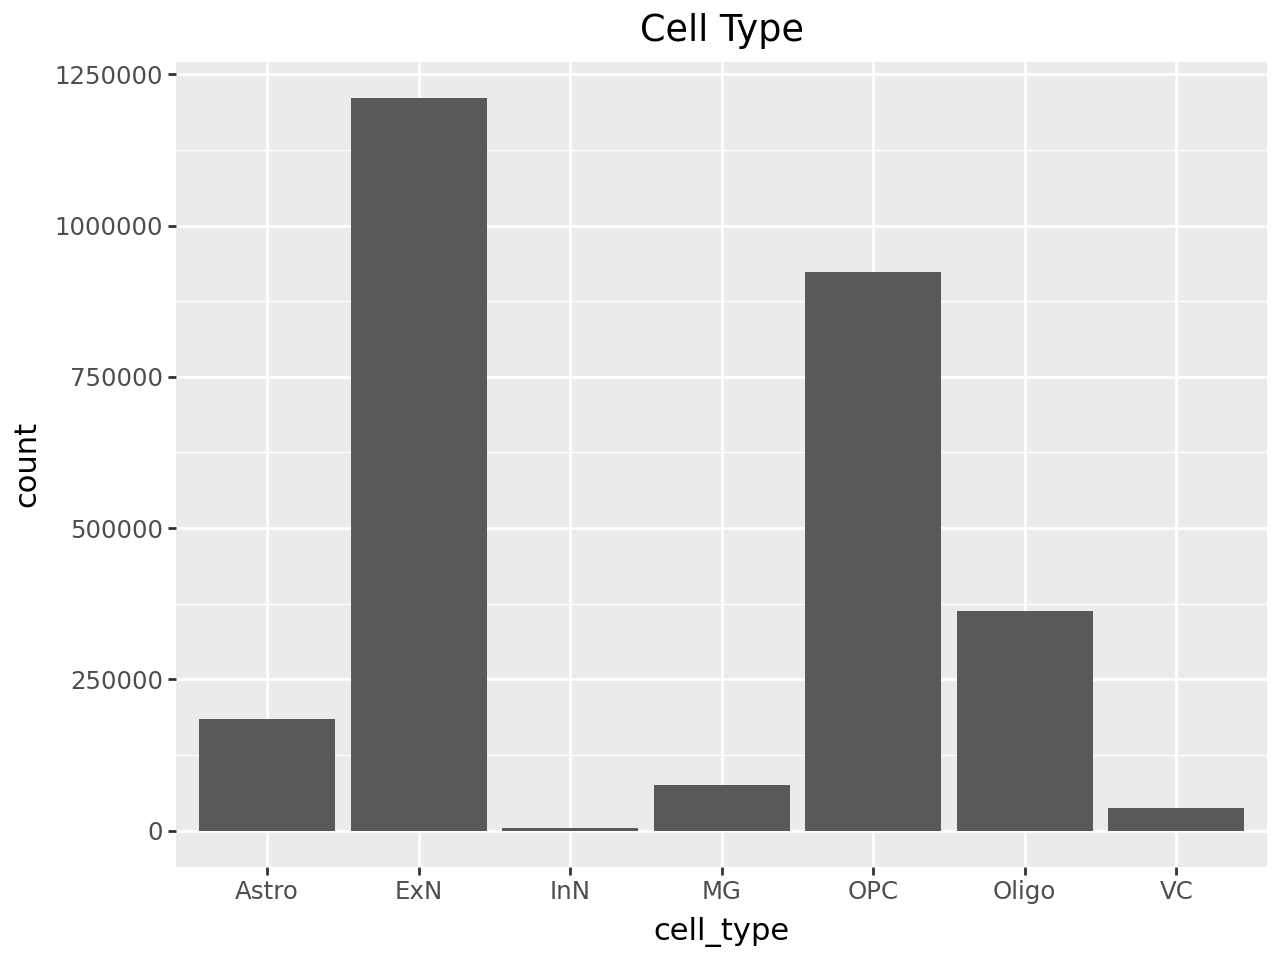

time: 6.18 s (started: 2025-03-05 21:35:04 -08:00)


In [12]:
# Cell type counts
(
    p9.ggplot(cell_metadata_df, p9.aes("cell_type"))
    + p9.geom_bar()
    + p9.ggtitle("Cell Type")
).show()

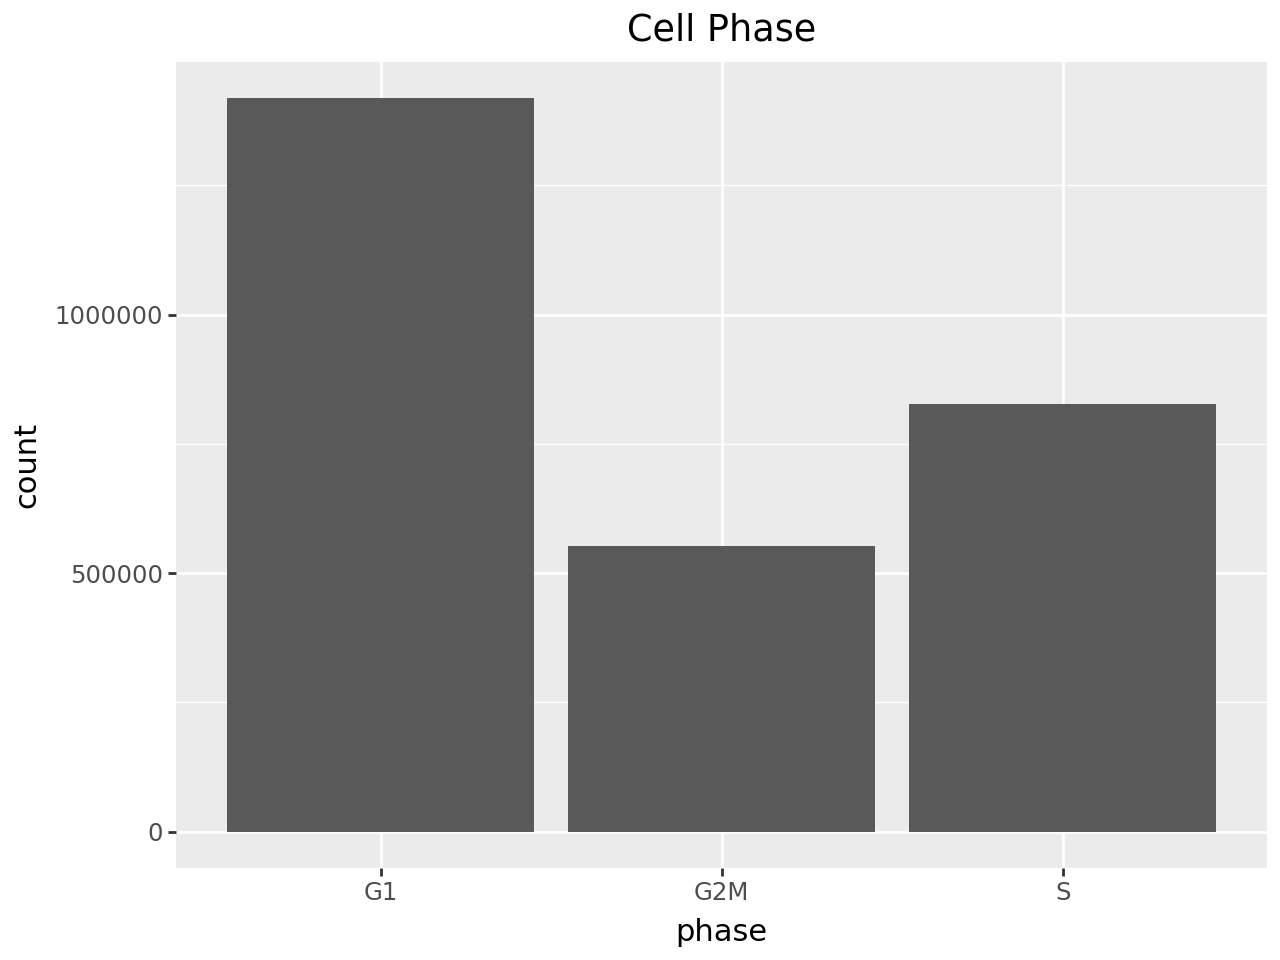

time: 6.04 s (started: 2025-03-05 21:35:10 -08:00)


In [13]:
# Cell phase counts
(
    p9.ggplot(cell_metadata_df, p9.aes("phase"))
    + p9.geom_bar()
    + p9.ggtitle("Cell Phase")
).show()

We can create 'n_genes_by_counts' vs 'total_counts' scatter plots, colored by cell type using [matplotlib](https://matplotlib.org/) via [pandas](https://pandas.pydata.org/)


Let's plot histograms of `n_genes_by_counts` and `counts`.

/tmp/ipykernel_1359490/1942180489.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


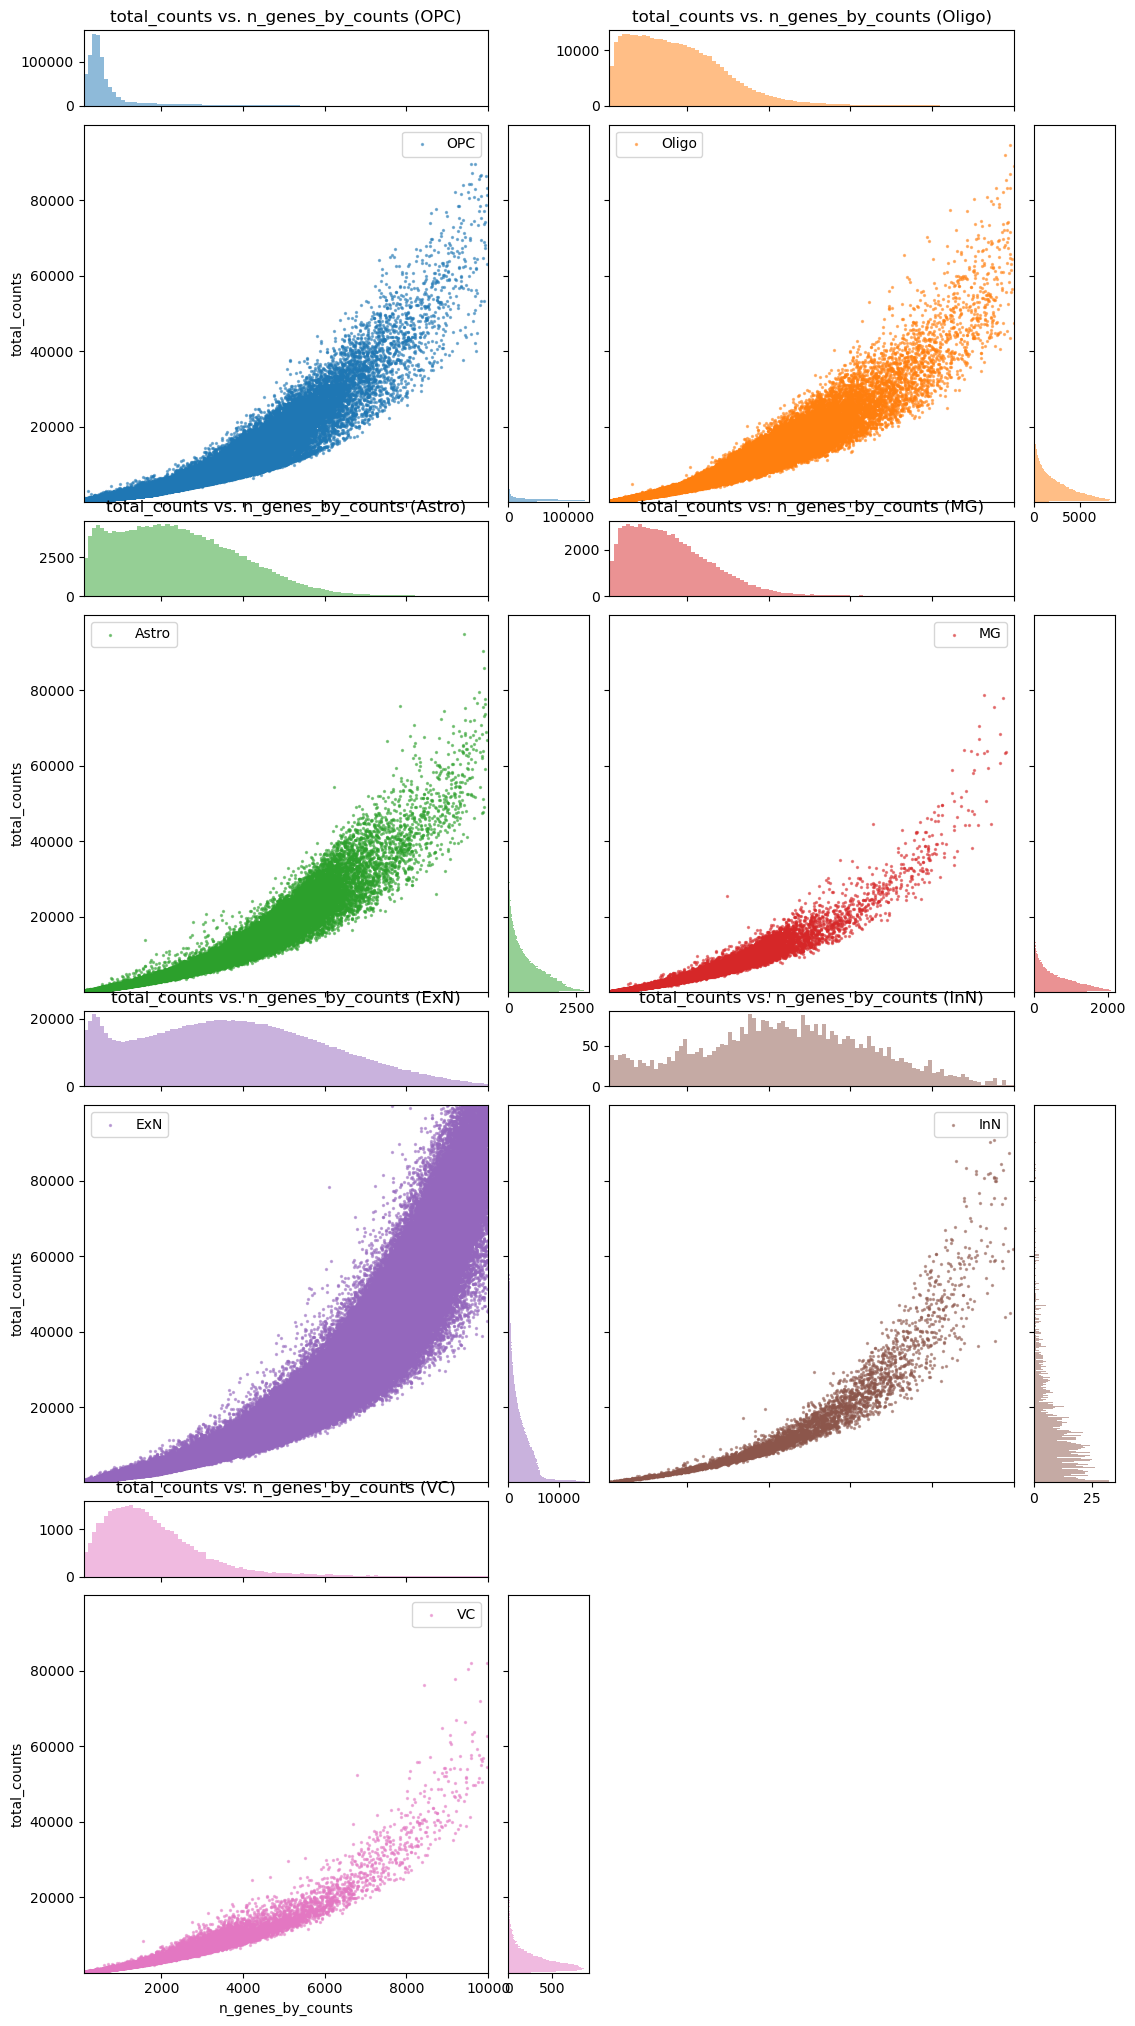

time: 11.5 s (started: 2025-03-05 21:35:16 -08:00)


In [14]:
ncols, nrows = 2, 4
cell_types = cell_metadata_df["cell_type"].unique()
num_cell_types = len(cell_types)

# Create subplots with space for marginal histograms
fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(6 * ncols, 6 * nrows),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Scatter plot for each cell type
x_min = cell_metadata_df["n_genes_by_counts"].min()
x_max = cell_metadata_df["n_genes_by_counts"].max()
y_min = cell_metadata_df["total_counts"].min()
y_max = cell_metadata_df["total_counts"].max()

for i, cell_type in enumerate(cell_types):
    df_cell_type = cell_metadata_df[cell_metadata_df["cell_type"] == cell_type]
    ax = axes[i]  # Use the corresponding subplot
    df_cell_type.plot.scatter(
        x="n_genes_by_counts",
        y="total_counts",
        color=plt.cm.tab10(i),
        label=cell_type,
        ax=ax,
        s=2,
        alpha=0.5,
    )

    # Add labels and title to each subplot
    ax.set_xlabel("n_genes_by_counts")
    ax.set_ylabel("total_counts")
    ax.set_title(f"total_counts vs. n_genes_by_counts ({cell_type})")

    # Set x and y limits for each subplot
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Create marginal histograms
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)  # Top
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)  # Right
    # # Create marginal histograms
    # ax_histx = ax.inset_axes([0, -0.3, 1, 0.2], sharex=ax)  # Bottom
    # ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)  # Right

    # Hide labels and ticks for marginal histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # # Plot histograms
    # ax_histx.hist(df_cell_type['n_genes_by_counts'], bins=20, color=plt.cm.tab10(i), alpha=0.5)
    # ax_histy.hist(df_cell_type['total_counts'], bins=20, color=plt.cm.tab10(i), alpha=0.5, orientation='horizontal')
    # Plot histograms with binwidth=100 and aligned limits
    ax_histx.hist(
        df_cell_type["n_genes_by_counts"],
        bins=range(int(x_min), int(x_max) + 100, 100),
        color=plt.cm.tab10(i),
        alpha=0.5,
    )
    ax_histy.hist(
        df_cell_type["total_counts"],
        bins=range(int(y_min), int(y_max) + 100, 100),
        color=plt.cm.tab10(i),
        alpha=0.5,
        orientation="horizontal",
    )
# Hide any unused subplots
for i in range(num_cell_types, len(axes)):
    axes[i].axis("off")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Dimensionality Reduction - UMAP

Let's have a look at the overall structure of the dataset by visualizing the [UMAP](https://umap-learn.readthedocs.io/en/latest/) 2D projection  of the data.  As the UMAP (or t-SNE) projections are somwehat arbitrary and don't preserve local OR global structure these are simply compact views at the data before further rigorous analysis.  E.g. ([link](https://pmc.ncbi.nlm.nih.gov/articles/PMC8195812/#:~:text=Despite%20their%20strengths%2C%20t%2DSNE,points%20in%20the%20source%20dataset), and [link](https://www.biorxiv.org/content/10.1101/2021.08.25.457696v1) )

The umaps here are constructed from the aproxamate nearest neighbor graph of the [scVI](https://docs.scvi-tools.org/en/stable/user_guide/models/scvi.html) latents fit to the overall dataset.

The UMAP and scVI components are stored in an [AnnData](https://anndata.readthedocs.io/en/latest/) object.  We'll use [scanpy](https://scanpy.readthedocs.io/en/stable/) to visualize these components with various metrics overlaid on them.

We can use the UMAP vectors from the cell-metadata table and [seaborn](https://seaborn.pydata.org/) to visualize some of the QC metrics in a 2D UMAP.

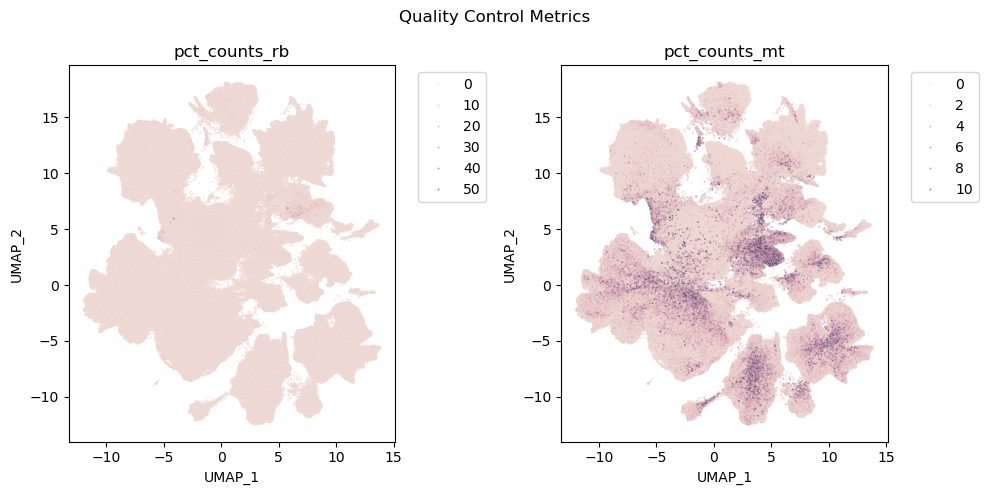

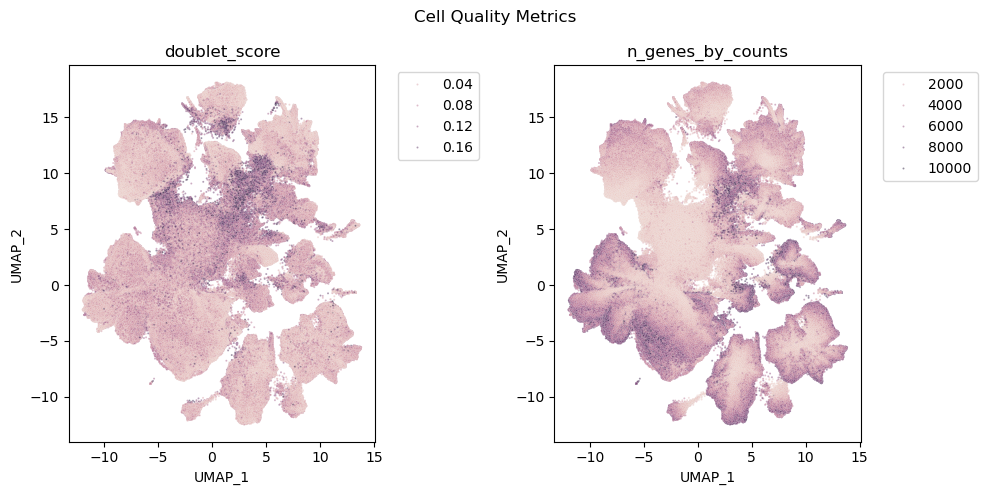

time: 2min 28s (started: 2025-03-05 21:35:28 -08:00)


In [15]:
# Define plot groups and their respective metadata columns
plot_groups = {
    "Quality Control Metrics": ["pct_counts_rb", "pct_counts_mt"],
    "Cell Quality Metrics": ["doublet_score", "n_genes_by_counts"],
    # 'Batch Information': ['batch', 'batch_id'],
    # 'Cell Phase and Type': ['phase', 'cell_type']
}


# Iterate over plot groups and create separate figures
for group_name, metadata_cols in plot_groups.items():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle(group_name)

    for i, metadata_col in enumerate(metadata_cols):
        sns.scatterplot(
            x="UMAP_1",
            y="UMAP_2",
            hue=metadata_col,
            data=cell_metadata_df,
            ax=axes[i],
            s=2,
            alpha=0.5,
        )
        axes[i].set_title(f"{metadata_col}")
        axes[i].set_xlabel("UMAP_1")
        axes[i].set_ylabel("UMAP_2")
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

## Copy dataset `anndata` to workspace 

Loading the dataset directly from the gcp bucket is inefficient.  Lets first copy it to our workspace files.

In [16]:
adata_filename = cohort_analysis_path / f"asap-{dataset_team}.final_adata.h5ad"
local_adata_filename = local_data_path / f"asap-{dataset_team}.final_adata.h5ad"


time: 321 μs (started: 2025-03-05 21:37:56 -08:00)


In [17]:
if not local_adata_filename.exists():
    !cp {adata_filename} {local_adata_filename}

time: 18.6 ms (started: 2025-03-05 21:37:56 -08:00)


## Load `anndata` objects 
Now lets load the expression data object and use `scanpy` to do some visualizations.

In [18]:
adata = sc.read_h5ad(local_adata_filename, backed="r")

adata

AnnData object with n_obs × n_vars = 2796736 × 3000 backed at '/home/ergonyc/workspace/01_PMDBS_scRNAseq_Datasets/asap-curated-cohort-pmdbs-sc-rnaseq/pmdbs_sc_rnaseq/cohort_analysis/asap-cohort.final_adata.h5ad'
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'total_counts', 'total_counts_rb', 'pct_counts_rb', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'sample', 'batch', 'team', 'dataset', 'batch_id', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.20', 'leiden_res_0.40', 'cell_type'
    var: 'feature_type', 'genome', 'gene_id', 'mt', 'rb'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'estimator', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_test_epoch', 'learning_curve_train_epoch', 'leiden', 'log1p', 'neighbors', 'pca', 'scrublet', 'target_false_positive_rate', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_

time: 41.1 s (started: 2025-03-05 21:37:56 -08:00)


We can see that our `adata` object contains the cell-wise metadata in the `adata.obs` field, and gene-wise metadata in `adata.var`.  This `*.final_adata.h5ad` file contains only the top 3000 highly-variable genes.

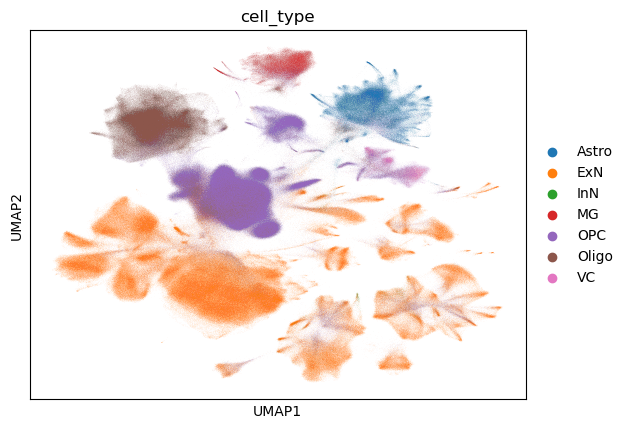

time: 7.72 s (started: 2025-03-05 21:38:37 -08:00)


In [19]:
# UMAP
sc.pl.embedding(adata, basis="umap", color=["cell_type"])

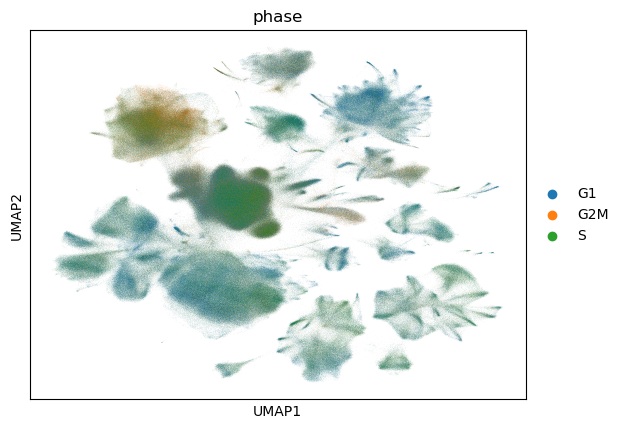

time: 7.73 s (started: 2025-03-05 21:38:45 -08:00)


In [20]:
# UMAP
sc.pl.embedding(adata, basis="umap", color=["phase"])

### Load _dataset_-metadata and merge with our _cell_-metadata
First lets load some of the _dataset_-metadata and map this information into our _cell_-metadata.
This will be used to annotate experimental conditions into our _cell_-level metadata.    In the next section we will use this to create subsets of our `asap-cohort` PMDBS snRNAseq dataset, and encode Parkinson's disease state.

Specifically we'll combine Sample-level, Subject-level, PMDBS specific  and experimental condition metadata, by combining the `SAMPLE`, `SUBJECT`, `PMDBS`, and `CONDITION` tables.


In [10]:
# Sample-level metadata
SAMPLE = pd.read_csv(ds_metadata_path / "SAMPLE.csv", index_col=0)
# subject-level metadata
SUBJECT = pd.read_csv(ds_metadata_path / "SUBJECT.csv", index_col=0)
#  brain-sample metadata
PMDBS = pd.read_csv(ds_metadata_path / "PMDBS.csv", index_col=0)
# experimental condition metadata
CONDITION = pd.read_csv(ds_metadata_path / "CONDITION.csv", index_col=0)

# Just take a few of the columns which we need
sample_cols = [
    "ASAP_sample_id",
    "ASAP_subject_id",
    "ASAP_team_id",
    "ASAP_dataset_id",
    "replicate",
    "condition_id",
]
subject_cols = [
    "ASAP_subject_id",
    "source_subject_id",
    "sex",
    "age_at_collection",
    "primary_diagnosis",
]
pmdbs_cols = [
    "ASAP_sample_id",
    "brain_region",
    "region_level_1",
    "region_level_2",
    "region_level_3",
]
condition_cols = [
    "condition_id",
    "intervention_name",
    "intervention_id",
    "protocol_id",
]

time: 1.3 s (started: 2025-03-06 08:53:37 +00:00)


Now lets merge the teables into the metadata we are interested in, and create some dictionary "mappers" to encode each cell by their sample IDs.  

The _cell_-metadata sample is encoded as the `ASAP_sample_id` + `replicate`. 

In [11]:
df = pd.merge(
    SAMPLE[sample_cols], CONDITION[condition_cols], on="condition_id", how="left"
)
# then JOIN the result with SUBJECT on "ASAP_subject_id" how=left to get "age_at_collection", "sex", "primary_diagnosis"
df = pd.merge(df, SUBJECT[subject_cols], on="ASAP_subject_id", how="left")
# then JOIN the result with PMDBS on "ASAP_subject_id" how=left to get "brain_region"
df = pd.merge(df, PMDBS[pmdbs_cols], on="ASAP_sample_id", how="left")

# add a sample column
df["sample"] = df["ASAP_sample_id"] + "_" + df["replicate"]

time: 137 ms (started: 2025-03-06 08:53:38 +00:00)


Before we encode each cell's brain region identity, lets fix a few discrepancies in how the various contributions metadata were encoded. 

In [12]:
# recode brain region to be "PFC", "MFG", "HIP", "SN", "ACG", "IPL, "AMG", "PUT"
brain_fix = {
    "Prefrontal Cortex": "PFC",
    "Middle_Frontal_Gyrus": "MFG",
    "Hippocampus": "HIP",
    "Substantia_Nigra ": "SN",
    "Substantia_Nigra": "SN",
    "ACG": "ACG",
    "IPL": "IPL",
    "Middle temporal gyrus": "MTG",
    "Substantia nigra": "SN",
    "Prefrontal cortex": "PFC",
    "Amygdala": "AMG",
    "Putamen": "PUT",
}
df["brain_region"] = df["brain_region"].map(brain_fix)

time: 2.38 ms (started: 2025-03-06 08:53:39 +00:00)


In [13]:
# now map to find more course designations
brain_simple = {
    "PFC": "frontal_ctx",
    "MFG": "frontal_ctx",
    "ACG": "cingulate_ctx",
    "IPL": "parietal_ctx",
    "MTG": "temporal_ctx",
    "HIP": "subcortical",
    "AMG": "subcortical",
    "PUT": "subcortical",
    "SN": "subcortical",
}

df["brain_region_simple"] = df["brain_region"].map(brain_simple)

time: 2.03 ms (started: 2025-03-06 08:53:39 +00:00)


And then we can make the mapings from sample IDs to the metadata values.

In [14]:
# define sample to match
br_mapper_full = dict(zip(df["sample"], df["brain_region"]))
br_mapper_simple = dict(zip(df["sample"], df["brain_region"].map(brain_simple)))

# Parkinsons and control samples
condition_id_mapper = dict(zip(df["sample"], df["condition_id"]))
case_id_mapper = dict(zip(df["sample"], df["intervention_id"]))

time: 2.93 ms (started: 2025-03-06 08:53:40 +00:00)


Lets save this _dataset_ metadata for later use in mapping the brain region and Case vs. Control to each cell in a frontal cortex sub-set of our cohort dataset.

In [15]:
dataset_metadata_filen = local_data_path / "asap-cohort-dataset-metadata.csv"
df.to_csv(dataset_metadata_filen)

time: 33.6 ms (started: 2025-03-06 08:53:41 +00:00)


Now lets do the mapping and see how many observations we have for a _frontal cortex_ dataset.   And how many PD vs. Control we have.

In [16]:
# add brain region to adata.obs
obs = adata.obs.copy()

obs["brain_region"] = obs["sample"].map(br_mapper_full)
obs["brain_region_simple"] = obs["sample"].map(br_mapper_simple)
obs["case_id"] = obs["sample"].map(case_id_mapper)

NameError: name 'adata' is not defined

time: 39.8 ms (started: 2025-03-06 08:53:44 +00:00)


In [17]:
obs["brain_region_simple"].value_counts()

NameError: name 'obs' is not defined

time: 23.5 ms (started: 2025-03-06 08:53:44 +00:00)


In [43]:
frontal_cells = obs["brain_region_simple"] == "frontal_ctx"
frontal_cells.value_counts()

brain_region_simple
False    2504949
True      291787
Name: count, dtype: int64

time: 86.4 ms (started: 2025-03-05 21:39:23 -08:00)


In [44]:
obs.loc[frontal_cells, "case_id"].value_counts()

case_id
Case       178065
Control    113722
Name: count, dtype: int64

time: 17.1 ms (started: 2025-03-05 21:39:23 -08:00)


-----------------
# Next:

Continue with:
- Part 2 - `AnnData` Data Composition - [02_dataset_composition.ipynb](./02_dataset_composition.ipynb)


--------------------
# Provenance
Generate information about this notebook environment and the packages installed.

In [31]:
!date

Wed Mar  5 09:38:53 PM PST 2025
time: 520 ms (started: 2025-03-05 21:38:53 -08:00)


pip installed packages:

> TODO: make this dynamically use conda

In [32]:
!pip freeze

anndata==0.11.3
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1736174388474/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1733311059102/work
argon2-cffi-bindings @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi-bindings_1725356585055/work
array_api_compat==1.10.0
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1733584251875/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1733250440834/work
async-lru @ file:///home/conda/feedstock_root/build_artifacts/async-lru_1733584297267/work
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1737819173731/work
babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1738490167835/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1738740337718/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bld/rattler-build_bleach_1737382993/work
Brotli @ file:///home/conda/feedstoc

JupyterLab extensions:

In [33]:
!jupyter labextension list

JupyterLab v4.3.5
/home/ergonyc/mambaforge/envs/nb_env/share/jupyter/labextensions
        jupyterlab_pygments v0.3.0 enabled OK (python, jupyterlab_pygments)
        @jupyter-notebook/lab-extension v7.3.2 enabled OK
        @jupyter-widgets/jupyterlab-manager v5.0.13 enabled OK (python, jupyterlab_widgets)

time: 950 ms (started: 2025-03-05 21:38:54 -08:00)


Number of cores:

In [34]:
!grep ^processor /proc/cpuinfo | wc -l

16
time: 482 ms (started: 2025-03-05 21:38:55 -08:00)


Memory:

In [35]:
!grep "^MemTotal:" /proc/meminfo

MemTotal:       131766824 kB
time: 477 ms (started: 2025-03-05 21:38:56 -08:00)
